# correlateion with clinical improvement

In [ ]:
from PDdatasets.subject import load_subjects
from statistical_analysis import correlation
import numpy as np

subjects = load_subjects(r'H:\006pd_DTI\02_data_management\subject_info.csv')

from statistical_analysis.ttest import load_clinical

node_edges = 246
obs_name1 = 'base'
obs_name2 = '030d'
filename = 'fc_r_BN246.txt'
intensity_thres = 0.3

c_names = ['handtremor','CRST_A','CRST_B', 'CRST_C', 'CRST_TOTAL' ]

for c_name in c_names:
    clinical_v1 = load_clinical(subjects, obs_name1, c_name)
    clinical_v2 = load_clinical(subjects, obs_name2, c_name)
    clinical_delta = clinical_v1 - clinical_v2

    for j in range(node_edges):

        all_edges_delta = []
        for subject in subjects:
            observation1 = subject.get_observation(obs_name1)
            observation2 = subject.get_observation(obs_name2)
            
            fc1 = np.loadtxt(observation1.bold.build_path(filename))
            fc2 = np.loadtxt(observation2.bold.build_path(filename))
            
            # node_edge 0-245
            edges1 = fc1[j]
            edges1 = np.absolute(edges1)
            edges1[edges1<intensity_thres] = 0
            edges2 = fc2[j]
            edges1 = np.absolute(edges1)
            edges1[edges1<intensity_thres] = 0

            edges_delta = edges1 - edges2
            all_edges_delta.append(edges_delta)
        
        all_edges_delta = np.array(all_edges_delta).T
        
        i = 0
        for edge in all_edges_delta:
            r,p = correlation.correlation(clinical_delta, edge)
            if p < 0.001: 
                print('Clinical:{} obs:{}-{}, Edge:{}-{}, r:{:.2f}, p:{:.2e}'.format(c_name, obs_name1, obs_name2, j+1, i+1, r, p))
                #correlation.correlation(clinical_delta, edge, save=True, out_path=os.path.join(out_dir, '{}_{}'.format(metric, c_name)))
                correlation.correlation(clinical_delta, edge, save=True, show=False, out_path=os.path.join(out_dir, '{}_{}_{}'.format(j+1, i+1, c_name)))
            i += 1


# correlation with clinical alteration through all timepoints

In [ ]:

import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from PDdatasets.subject import load_subjects
import numpy as np
import pandas as pd
from statistical_analysis import correlation

subjects = load_subjects(r'H:\006pd_DTI\02_data_management\subject_info.csv')

intensity_thres = 0.3 

metrics = ['degree']  #metrics = ['degree','global_efficiency', 'transitivity']

c_names = ['handtremor','CRSTA_total','CRST b_total','CRST C','CRST TOTAL']
_, ax = plt.subplots(figsize=(float(9), float(6)))

with open(r'D:\Desktop\b.txt', 'w') as f:
    for metric in metrics:
        for c_name in c_names:
            subjects_values = []
            clinical_values = []
            for subject in subjects:
                observations = subject.get_all_observation()
                for obs in observations:
                    if obs.name != 'ncnc' and obs.name != '001d'and obs.name != '007d':
                        array = np.loadtxt(obs.bold.build_path('fc_r_BN246.txt'))
                        abs_array = np.absolute(array)
                        abs_array[abs_array<intensity_thres] = 0 
                        
                        subjects_values.append(abs_array)
                        clinical_values.append(obs.args[c_name])

            subjects_values = np.array(subjects_values)
            for i in range(246):
                for j in range(246):
                    subjects_value = subjects_values[:, i, j]
                    r, p = correlation.correlation(subjects_value, clinical_values, show=False)
                    if p<0.05/30012:
                        r, p = correlation.correlation(subjects_value, clinical_values, show=False)
                        print('{}-{},-{}-,{}, r,{}, p,{}'.format(i+1, j+1, metric, c_name, r, p), file=f)   #
                        # r, p = correlation.correlation(subjects_value, clinical_values, show=True)



C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


50 231 0.7337868915168831 3.5436278122853725e-07
50 239 0.7159070224232466 9.17355984201638e-07


C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


60 233 0.7367485564391935 3.005140001706102e-07


C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


70 228 0.7196452958148811 7.564258839753014e-07


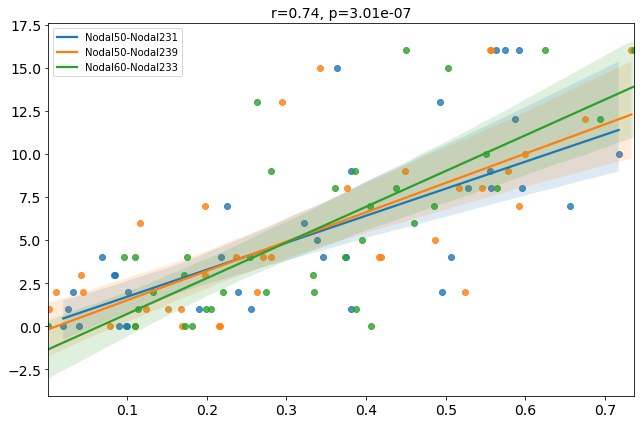

C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


225 242 0.7349892036777307 3.315137361682957e-07


C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


228 70 0.7196452958148811 7.564258839753014e-07


C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


228 231 0.7111257597364653 1.1689205560462058e-06


C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


231 50 0.7337868915168831 3.5436278122853725e-07
231 228 0.7111257597364653 1.1689205560462058e-06


C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


233 60 0.7367485564391935 3.005140001706102e-07


C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


239 50 0.7159070224232466 9.17355984201638e-07


C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


242 225 0.7349892036777307 3.315137361682957e-07


C:\Users\timkl\Anaconda3\envs\autumor\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


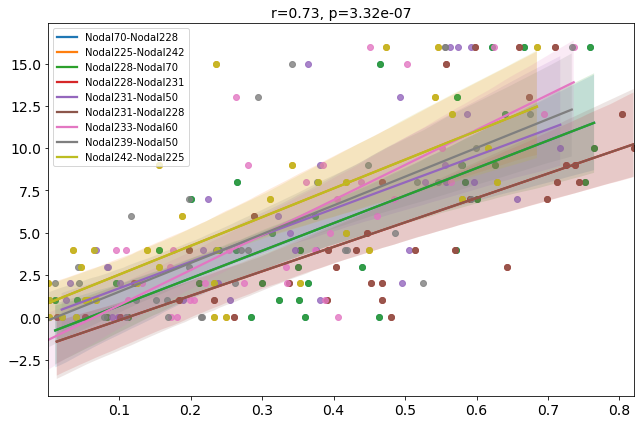

In [5]:
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from PDdatasets.subject import load_subjects
import numpy as np
import pandas as pd
from statistical_analysis import correlation

subjects = load_subjects(r'H:\006pd_DTI\02_data_management\subject_info.csv')


intensity_thres = 0.3 
out_path = r'H:\006pd_DTI\11_subnetwork_brant\12_4.0base360dsubnetwork\sta' 

#metrics = ['degree','global_efficiency', 'transitivity']

metrics = ['degree']

c_names = ['handtremor','CRSTA_total','CRST b_total','CRST C','CRST TOTAL']
_, ax = plt.subplots(figsize=(float(9), float(6)))

k = 0
legends = []
with open(r'D:\Desktop\temppppp\nodal\b.txt', 'w') as f:
    for metric in metrics:
        for c_name in c_names:
            subjects_values = []
            clinical_values = []
            for subject in subjects:
                observations = subject.get_all_observation()
                for obs in observations:
                    if obs.name != 'ncnc' and obs.name != '001d'and obs.name != '007d':
                        array = np.loadtxt(obs.bold.build_path('fc_r_BN246.txt'))
                        abs_array = np.absolute(array)
                        abs_array[abs_array<intensity_thres] = 0  

                        subjects_values.append(abs_array)
                        clinical_values.append(obs.args[c_name])

            subjects_values = np.array(subjects_values)
            for i in range(246):
                for j in range(i):  
                    subjects_value = subjects_values[:, i, j]
                    r, p = correlation.correlation(subjects_value, clinical_values, show=False)
                    if p<0.05/30012:
                        print(i,j,r,p)

                        if k == 3:
                            plt.legend(legends)
                            legends = []
                            plt.show()
                            plt.close()
                            _, ax = plt.subplots(figsize=(float(9), float(6)))

                        fontsize = 14
                        ax = sns.regplot(x=subjects_value,y=clinical_values, robust=True,
                                            ax=ax)
                        ax.set_title('r={:.2f}, p={:.2e}'.format(r, p), fontdict={'fontsize': fontsize})
                        ax.tick_params(axis='both', which='major', labelsize=fontsize)
                        plt.tight_layout()
                        legends.append(f'Nodal{i}-Nodal{j}')
                        k += 1
plt.legend(legends)
plt.show()
plt.close()

# 边的t正态分布：根据NBS计算的Tmap，将所有的边的tvalue进行正态分布

In [ ]:
import seaborn as sns
from PDutils import NBS_subnet_extract
import matplotlib.pyplot as plt

nbs_path = r'H:\006pd_DTI\10_BN_nbs_bold\02_R_wi0.3\for_edge\001d.mat' # 这里是node，记得该回去
ttest_values = NBS_subnet_extract.readin_NBS_test_stats(nbs_path)
ttest_values = -ttest_values # 原来的是术前和术后比较，现在是术后和术前的比较
ttest_values = ttest_values.flatten()
ax = sns.kdeplot(x=ttest_values, clip=(-6,6))

nbs_path = r'H:\006pd_DTI\10_BN_nbs_bold\02_R_wi0.3\for_edge\007d.mat'
ttest_values = NBS_subnet_extract.readin_NBS_test_stats(nbs_path)
ttest_values = -ttest_values
ttest_values = ttest_values.flatten()
ax = sns.kdeplot(x=ttest_values, clip=(-6,6), ax=ax)

nbs_path = r'H:\006pd_DTI\10_BN_nbs_bold\02_R_wi0.3\for_edge\030d.mat'
ttest_values = NBS_subnet_extract.readin_NBS_test_stats(nbs_path)
ttest_values = -ttest_values
ttest_values = ttest_values.flatten()
ax = sns.kdeplot(x=ttest_values, clip=(-6,6), ax=ax)

nbs_path = r'H:\006pd_DTI\10_BN_nbs_bold\02_R_wi0.3\for_edge\090d.mat'
ttest_values = NBS_subnet_extract.readin_NBS_test_stats(nbs_path)
ttest_values = -ttest_values
ttest_values = ttest_values.flatten()
ax = sns.kdeplot(x=ttest_values, clip=(-6,6), ax=ax)

nbs_path = r'H:\006pd_DTI\10_BN_nbs_bold\02_R_wi0.3\for_edge\360d.mat'
ttest_values = NBS_subnet_extract.readin_NBS_test_stats(nbs_path)
ttest_values = -ttest_values
ttest_values = ttest_values.flatten()
ax = sns.kdeplot(x=ttest_values, clip=(-6,6), ax=ax)

plt.legend()

In [ ]:
import seaborn as sns
from PDutils import NBS_subnet_extract
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


nbs_path = r'H:\006pd_DTI\10_BN_nbs_bold\02_R_wi0.3\for_edge\001d.mat' # 这里是node，记得该回去
ttest_values = NBS_subnet_extract.readin_NBS_test_stats(nbs_path)
ttest_values = -ttest_values # 原来的是术前和术后比较，现在是术后和术前的比较
ttest_values1 = ttest_values.flatten()

nbs_path = r'H:\006pd_DTI\10_BN_nbs_bold\02_R_wi0.3\for_edge\360d.mat'
ttest_values = NBS_subnet_extract.readin_NBS_test_stats(nbs_path)
ttest_values = -ttest_values
ttest_values2 = ttest_values.flatten()

t, p = ttest_ind(ttest_values1, ttest_values2)
print (t, p)

# plot

In [ ]:
import seaborn as sns
from PDutils import NBS_subnet_extract
import numpy as np

nbs_path = r'H:\006pd_DTI\10_BN_nbs_bold\02_R_wi0.3\for_edge\001d.mat'
ttest_values1 = NBS_subnet_extract.readin_NBS_test_stats(nbs_path)
ttest_values1 = np.triu(ttest_values1)

nbs_path = r'H:\006pd_DTI\10_BN_nbs_bold\02_R_wi0.3\for_edge\030d.mat'
ttest_values2 = NBS_subnet_extract.readin_NBS_test_stats(nbs_path)
ttest_values2 = np.triu(ttest_values2)

delta_edges = ttest_values2  - ttest_values1

def largest_indices(ary, n_percent):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    n = int(n_percent * flat.shape[0])
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

row_nodes, col_nodes = largest_indices(delta_edges, 0.0005)

v = []
for row_node, col_node in zip(row_nodes, col_nodes):
    v.append(delta_edges[row_node][col_node])

ax = sns.kdeplot(x=v)

###############################################################################


mask = np.zeros_like(delta_edges)
for row_node, col_node in zip(row_nodes, col_nodes):
    mask[row_node][col_node] = 1
masked_edges = np.multiply(delta_edges, mask)

masked_edges = masked_edges + masked_edges.T

from nilearn.plotting import plot_connectome

node_coords = np.loadtxt(r'H:\006pd_DTI\10_BN_nbs_bold\BN_MNI.txt')
plot_connectome(masked_edges, node_coords, node_color='auto', node_size=2)

In [ ]:
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from PDdatasets.subject import load_subjects
import numpy as np
import pandas as pd
from statistical_analysis import correlation

subjects = load_subjects(r'H:\006pd_DTI\02_data_management\subject_info.csv')
threshold_value = 0.3 
out_path = r'H:\006pd_DTI\11_subnetwork_brant\12_4.0base360dsubnetwork\sta' #输出路径

#metrics = ['degree','global_efficiency', 'transitivity']

metrics = ['degree']

c_names = ['handtremor','CRSTA_total','CRST b_total','CRST C','CRST TOTAL']
_, ax = plt.subplots(figsize=(float(9), float(6)))


for metric in metrics:
    for c_name in c_names:
        subjects_values = []
        clinical_values = []

        for subject in subjects:
            observations = subject.get_all_observation()
            for obs in observations:
                if obs.name != 'ncnc' and obs.name != '001d'and obs.name != '007d':
                    fc = np.loadtxt(obs.bold.build_path('fc_r_BN246.txt'))

                    subjects_values.append(fc)
                    clinical_values.append(obs.args[c_name])

        subjects_values = np.array(subjects_values)

        for i in range(246):
            for j in range(246):
                r, p = correlation.correlation(subjects_values[:, i, j], clinical_values, show=False)
                if p < 0.001:
                    print('FC----{},{},{},{}, r,{}, p,{}'.format(metric, c_name, i+1,j+1,  r, p))


'''
            ax = sns.regplot(x=subjects_values,y=clinical_values, robust=True,
                                ax=ax,  scatter=False)
            ax.set_title('r={:.2f}, p={:.2e}'.format(r, p), fontdict={'fontsize': 14})

            ax.set_ylim(bottom=0, top=80)
            ax.tick_params(axis='both', which='major', labelsize=14)
            plt.tight_layout()

            print('{}-{}, r:{}, p:{}'.format(metric, c_name, r, p))
    plt.legend(c_names, loc='upper left')
    plt.show()
'''